In [488]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [489]:
import numpy as np
import pandas as pd

In [490]:
import datetime as dt

In [491]:
import warnings
warnings.filterwarnings('ignore')

# Reflect Tables into SQLAlchemy ORM

In [492]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [493]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [494]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [495]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [496]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [497]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [498]:
# Display the row's columns and data in dictionary format
Measurment_frst_rw = session.query(Measurement).first()
Measurment_frst_rw.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x115f85160>,
 'tobs': 65.0,
 'prcp': 0.08,
 'id': 1,
 'date': '2010-01-01',
 'station': 'USC00519397'}

In [499]:
Station_frst_rw = session.query(Station).first()
Station_frst_rw.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x115785c50>,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1}

In [500]:
# Inspecting table structure and finding max and min date for measurement table for querying further
inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

# id INTEGER
# station TEXT
# date TEXT
# prcp FLOAT
# tobs FLOAT

columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

# id INTEGER
# station TEXT
# name TEXT
# latitude FLOAT
# longitude FLOAT
# elevation FLOAT

engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()
# min(date) : [('2010-01-01',)]
# max(date) : [('2017-08-23',)]

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [501]:
# Capture the year beginning and end date from the available data to run query for last year
lend_dt = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

st_dt = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(st_dt)
end_dt = dt.date(2016, 8, 23) + dt.timedelta(days=365)
print(end_dt)

2016-08-23
2017-08-23


In [502]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
# Sort the dataframe by date

Precipitation_res = session.query(Measurement.date, Measurement.prcp).\
                    filter(Measurement.date.between(st_dt, end_dt)).\
                    order_by(Measurement.date).all() 
Precipitation_12Mons=Precipitation_res
Precipitation_12Mons

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [503]:
# Save the query results as a Pandas DataFrame and set the index to the date column

date = [Precipitation_12Mons[0] for pr in Precipitation_12Mons[0:]]
date
prcp = [Precipitation_12Mons[1] for pr in Precipitation_12Mons[0:]]
prcp
prcp_df = pd.DataFrame(Precipitation_12Mons[0:], columns=['date', 'prcp'] )
prcp_df = prcp_df.rename(columns={'prcp': 'Precipitation'})
prcp_df.fillna(0, inplace=True)
prcp_df.set_index('date').head()
prcp_df.shape
prcp_df.head(5)

,date,Precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,0.00
4,2016-08-23,0.02


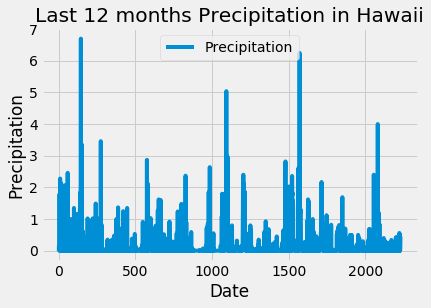

In [504]:
# Use Pandas Plotting with Matplotlib to plot the data

prcp_df.plot()
plt.title('Last 12 months Precipitation in Hawaii')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.show()
# Save the figure
fig.savefig('Precipitation_12Mons_Hawaii.png')


In [506]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,Precipitation
count,2230.000000
mean,0.160664
std,0.442067
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


In [507]:
# Design a query to show how many stations are available in this dataset?
No_Of_Stations = session.query(Measurement).group_by(Measurement.station).count()
print("Number of stations in this dataset are: ", No_Of_Stations)


Number of stations in this dataset are:  9


In [508]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
Actv_Stations_And_Counts = session.query(Measurement.station, func.count(Measurement.station)).\
                     group_by(Measurement.station).\
                     order_by(func.count(Measurement.station).desc()).all()

Most_Avtc_Station = Actv_Stations_And_Counts[0][0]
print("Most Active Station is: ", Most_Avtc_Station)

print("Listing the stations and the counts below in descending order:")
Actv_Stations_And_Counts

Most Active Station is:  USC00519281
Listing the stations and the counts below in descending order:


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [509]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
Stations_tobs = session.query(func.min(Measurement.tobs),\
                              func.max(Measurement.tobs),\
                              func.avg(Measurement.tobs)).\
                filter(Measurement.station == Most_Avtc_Station).all()  
Stations_tobs             
# [(54.0, 85.0, 71.66378066378067)]

[(54.0, 85.0, 71.66378066378067)]

In [510]:
# Choose the station with the highest number of temperature observations.

Station_high_temp_obs = session.query(Measurement.tobs).filter(Measurement.station == Most_Avtc_Station).\
       filter(Measurement.date>=st_dt).filter(Measurement.date <= end_dt).all()
Station_high_temp_obs

Station_high_temp_obs_df = pd.DataFrame(Station_high_temp_obs[0:], columns=['Tobs'] )
Station_high_temp_obs_df.fillna(0, inplace=True)
Station_high_temp_obs_df.head(5)

,Tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


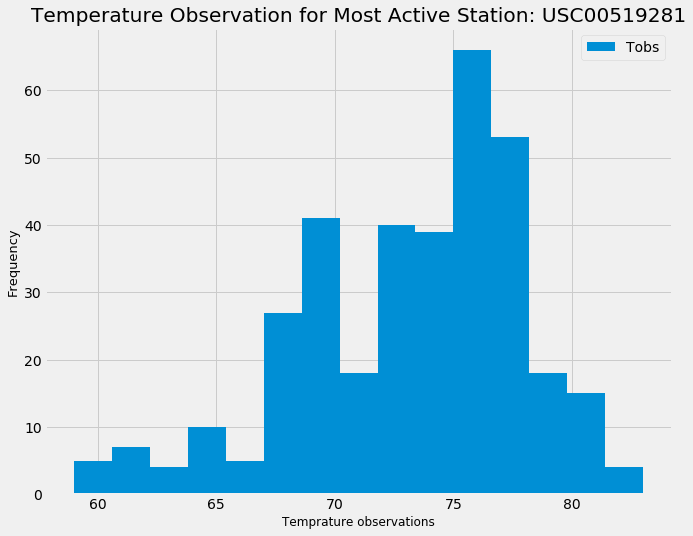

In [511]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

fig=plt.figure(figsize=(10,8))
plt.hist(Station_high_temp_obs_df['Tobs'],15, label="Tobs")
plt.xlabel("Temprature observations",fontsize=12)
plt.ylabel("Frequency",fontsize=13)
plt.title("Temperature Observation for Most Active Station: "+ Most_Avtc_Station)
plt.legend()

# Save the figure and show
plt.savefig('USC00519281_12Mons_Temp_Obs_Hist.png')
plt.show()

In [512]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example

# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
avg_temp_year_b4 =(calc_temps(st_dt, end_dt))
AvgTemp=avg_temp_year_b4[0][1]
MimTemp=avg_temp_year_b4[0][0]
MaxTemp=avg_temp_year_b4[0][2]
avg_temp_year_b4

[(58.0, 74.59058295964125, 87.0)]

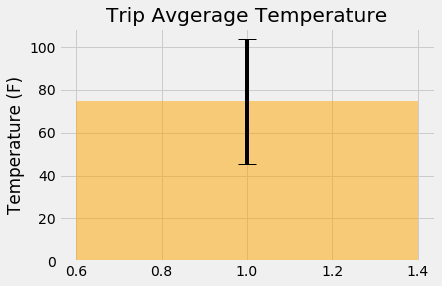

In [513]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

fig, ax = plt.subplots()
ax.bar(1, AvgTemp, yerr = (MaxTemp-MimTemp),align='center',color = "orange",alpha=0.5, ecolor='black', capsize=9)
ax.set_ylabel('Temperature (F)')
ax.set_title('Trip Avgerage Temperature')
ax.yaxis.grid(True)

# Save the figure and show
plt.savefig('Avg_Trip_Temp_Err_bar.png')
plt.show()

In [514]:
engine.execute('SELECT * from Measurement LIMIT 5').fetchall()
# id INTEGER
# station TEXT
# date TEXT
# prcp FLOAT
# tobs FLOAT

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [515]:
engine.execute('SELECT * from Station LIMIT 5').fetchall()
# id INTEGER
# station TEXT
# name TEXT
# latitude FLOAT
# longitude FLOAT
# elevation FLOAT

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [516]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

Columns = [Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation, func.sum(Measurement.prcp)]
RainPer_WeatherStation = session.query(*Columns).\
                         filter(Measurement.station == Station.station).\
                         filter(Measurement.date.between(st_dt, end_dt)).\
                         group_by(Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation).\
                         order_by(func.sum(Measurement.prcp).desc()).all()
                                 
RainPer_WeatherStation

RainPer_WeatherStation_df = pd.DataFrame(RainPer_WeatherStation[0:], columns=['Station','Name', 'Latitude', 'Longitude','Elevation', 'TotalPrcp'] )
RainPer_WeatherStation_df

,Station,Name,Latitude,Longitude,Elevation,TotalPrcp
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,147.81
1,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,70.03
2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,48.51
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,38.01
4,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,33.24
5,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,16.09
6,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,4.59


## Optional Challenge Assignment

In [517]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [518]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [519]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [520]:
# Plot the daily normals as an area plot with `stacked=False`
